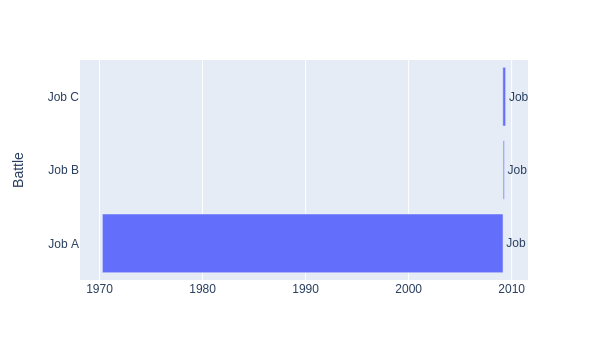

In [40]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame([
    dict(Battle="Job A", Start='1970-04-13', End='2009-02-28'),
    dict(Battle="Job B", Start='2009-03-05', End='2009-04-15'),
    dict(Battle="Job C", Start='2009-02-20', End='2009-05-30')
])

fig = px.timeline(df, x_start="Start", x_end="End", y="Battle", text='Battle') # textposition argument not possible
fig.update_traces(textposition='outside')
fig.show()

In [ ]:
import matplotlib.pyplot as plt
from datetime import date
from datetime import timedelta
import numpy as np
%matplotlib inline

In [53]:
from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm

def char_in_font(unicode_char, font):
    for cmap in font['cmap'].tables:
        if cmap.isUnicode():
            if ord(unicode_char) in cmap.cmap:
                return True
    return False

uni_char =  u"✹"
# or uni_char = u"\uFDFA"

font_info = [(f.fname, f.name) for f in mfm.fontManager.ttflist]

for i, font in enumerate(font_info):
    if char_in_font(uni_char, TTFont(font[0])):
        print(font[0], font[1])

/home/tanwir/miniconda3/envs/timeline/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf DejaVu Sans
/home/tanwir/miniconda3/envs/timeline/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf DejaVu Sans Mono
/home/tanwir/miniconda3/envs/timeline/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf DejaVu Sans
/home/tanwir/miniconda3/envs/timeline/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf DejaVu Sans
/home/tanwir/miniconda3/envs/timeline/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf DejaVu Sans
/home/tanwir/miniconda3/envs/timeline/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf DejaVu Sans Mono
/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf DejaVu Sans
/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed.ttf DejaVu Sans
/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf DejaVu Sans Mono
/usr/share/

TTLibError: specify a font number between 0 and 9 (inclusive)

In [35]:
from matplotlib.font_manager import FontProperties

if __name__ == "__main__":
    plt.figure() 
    prop = FontProperties()
    prop.set_file('Helvetica-Font/helvetica-light-587ebe5a59211.ttf')

<Figure size 432x288 with 0 Axes>

In [46]:
dates = [date(570, 4, 22), 
         date(577, 1, 1),
         date(579, 1, 1),
         date(583, 1, 1),
         date(596, 1, 1),
         date(601, 1, 1),
         date(604, 1, 1)
        ]
min_date = date(np.min(dates).year - 2, np.min(dates).month, np.min(dates).day)
max_date = date(np.max(dates).year + 2, np.max(dates).month, np.max(dates).day)

labels = ["Rasulullah ﷺ born", 
          "Amina passes away",
          "Abdul Muttalib passes away",
          "Prophet ﷺ travels towards Syria\nand meets Bahira",
          "Marriage with Khadijaؓ",
          "Birth of Zainabؓ",
          "Birth of Ruqayyahؓ"
         ]
# labels with associated dates
labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels, dates)]

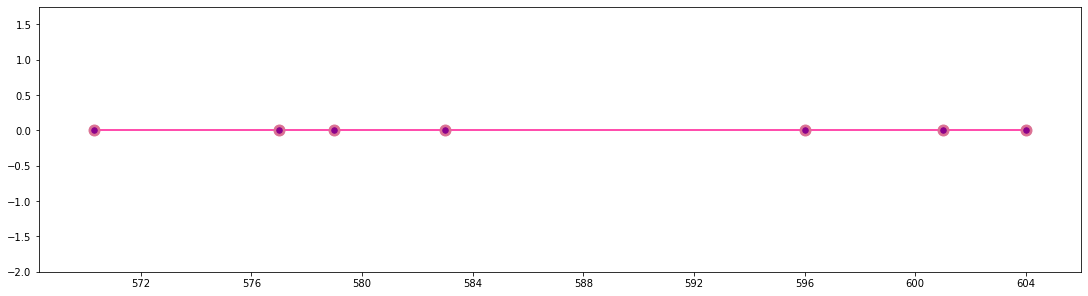

In [47]:
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
_ = ax.set_ylim(-2, 1.75)
_ = ax.set_xlim(min_date, max_date)
_ = ax.axhline(0, xmin=0.05, xmax=0.95, c='deeppink', zorder=1)
 
_ = ax.scatter(dates, np.zeros(len(dates)), s=120, c='palevioletred', zorder=2)
_ = ax.scatter(dates, np.zeros(len(dates)), s=30, c='darkmagenta', zorder=3)

In [48]:
label_offsets = np.zeros(len(dates))
label_offsets[::2] = 0.35
label_offsets[1::2] = -0.7
for i, (l, d) in enumerate(zip(labels, dates)):
    _ = ax.text(d, label_offsets[i], l, ha='center', fontname='Helvetica', fontweight='bold', color='royalblue',fontsize=12)

In [49]:
stems = np.zeros(len(dates))
stems[::2] = 0.3
stems[1::2] = -0.3   
markerline, stemline, baseline = ax.stem(dates, stems, use_line_collection=True)
_ = plt.setp(markerline, marker=',', color='darkmagenta')
_ = plt.setp(stemline, color='darkmagenta')

In [50]:
# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
 
# hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])
 
_ = ax.set_title('Seerah Timeline', fontweight="bold", fontfamily='sans-serif', fontsize=16, 
                 color='royalblue')

/home/tanwir/miniconda3/envs/timeline/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 65018 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tanwir/miniconda3/envs/timeline/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 1555 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tanwir/miniconda3/envs/timeline/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 65018 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/tanwir/miniconda3/envs/timeline/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 1555 missing from current font.
  font.set_text(s, 0, flags=flags)


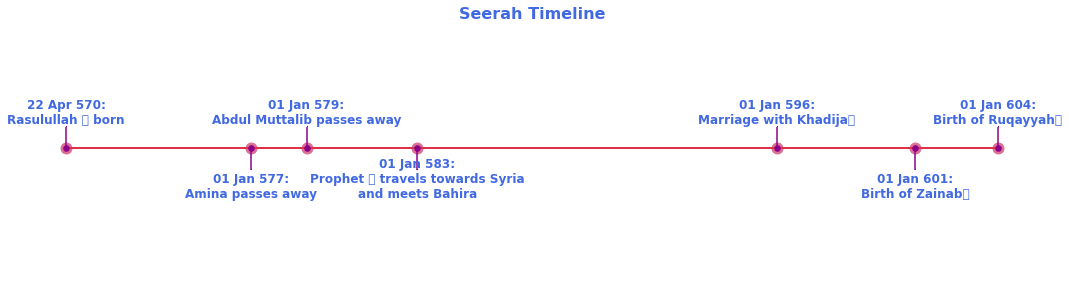

In [51]:
fig

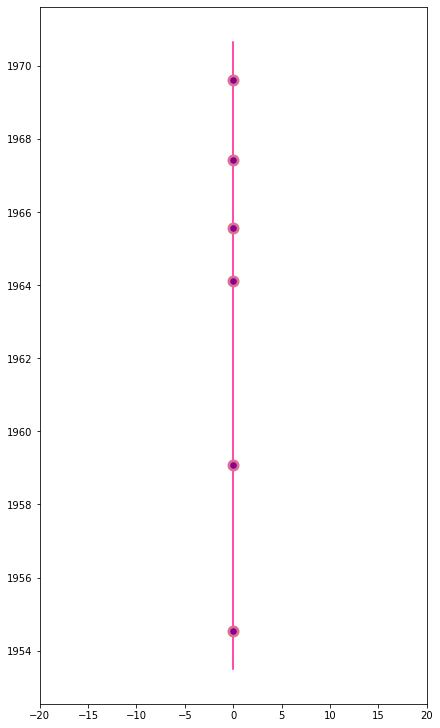

In [12]:
fig, ax = plt.subplots(figsize=(6, 10), constrained_layout=True)
_ = ax.set_xlim(-20, 20)
_ = ax.set_ylim(min_date, max_date)
_ = ax.axvline(0, ymin=0.05, ymax=0.95, c='deeppink', zorder=1)
 
_ = ax.scatter(np.zeros(len(dates)), dates, s=120, c='palevioletred', zorder=2)
_ = ax.scatter(np.zeros(len(dates)), dates, s=30, c='darkmagenta', zorder=3)

In [13]:
label_offsets = np.repeat(2.0, len(dates))
label_offsets[1::2] = -2.0
for i, (l, d) in enumerate(zip(labels, dates)):
    d = d - timedelta(days=90)
    align = 'right'
    if i % 2 == 0:
        align = 'left'
    _ = ax.text(label_offsets[i], d, l, ha=align, fontfamily='serif', fontweight='bold', color='royalblue',fontsize=12)

In [14]:
stems = np.repeat(2.0, len(dates))
stems[1::2] *= -1.0   
x = ax.hlines(dates, 0, stems, color='darkmagenta')

In [15]:
# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
 
# hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])
 
_ = ax.set_title('Important Milestones in Rock and Roll', fontweight="bold", fontfamily='serif', fontsize=16, 
                 color='royalblue')

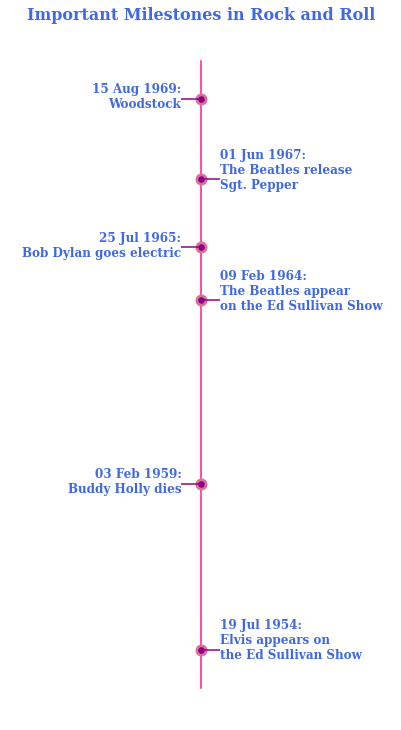

In [16]:
fig